# NAME: Lalitha Krishnamurthy

## Project: 1

## Module : Computer Vision

## Project Domain: Botanical Research


## CONTEXT: 

University X is currently undergoing some research involving understanding the characteristics of
plant and plant seedlings at various stages of growth. They already have have invested on curating sample
images. They require an automation which can create a classi ier capable of determining a plant's species from a
photo

## DATA DESCRIPTION: 

The dataset comprises of images from 12 plant species. Source: https://www.kaggle.com/c/
plant-seedlings-classi ication/data

## PROJECT OBJECTIVE: 

University’s management require an automation which can create a classi ier capable of
determining a plant's species from a photo

## Steps and tasks:

1. Import the data. Analyse the dimensions of the data. Visualise the data.

2. Design, train tune and test the best AIML image classi ier model using:

• Supervised learning algorithms

• Neural networks

• CNN

3. Compare the results from the above step along with your detailed observations on the best performing algorithm and
   why/how it outperforms other algorithms in this case.

4. Pickle the best performing model.

5. Import the the test image [ from the “ Prediction” folder ] to predict the class. Display the image. Use the best trained
image classi ier model to predict the class.



# SOLUTION

# 1. Import Libraries

In [54]:
# import library files

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
#Test Train Split
from sklearn.model_selection import train_test_split
#Feature Scaling library
from sklearn.preprocessing import StandardScaler
#import pickle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense,Dropout
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam
import imageio
from skimage.io import imread

## 1. Importing data

**Set the appropriate path for the datsaet zip provided**

In [2]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


## Analyse the dimensions of the data

In [49]:
train_path = r'/content/grive/MyDrive/Computer_Vision/train'
folder=os.listdir(train_path)
print("list of plant seedling types")
folder

list of plant seedling types


['Common Chickweed',
 'Cleavers',
 'Loose Silky-bent',
 'Sugar beet',
 'Common wheat',
 'Fat Hen',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Maize',
 'Small-flowered Cranesbill',
 'Black-grass',
 'Charlock']

Print one image from all the folders
Common Chickweed
size of the printed image  (441, 441, 3)
Cleavers
size of the printed image  (116, 116, 3)
Loose Silky-bent
size of the printed image  (115, 115, 3)
Sugar beet
size of the printed image  (548, 548, 3)
Common wheat
size of the printed image  (64, 64, 3)
Fat Hen
size of the printed image  (118, 118, 3)
Scentless Mayweed
size of the printed image  (525, 525, 3)
Shepherds Purse
size of the printed image  (119, 119, 3)
Maize
size of the printed image  (448, 448, 3)
Small-flowered Cranesbill
size of the printed image  (219, 219, 3)
Black-grass
size of the printed image  (471, 471, 3)
Charlock
size of the printed image  (502, 502, 3)


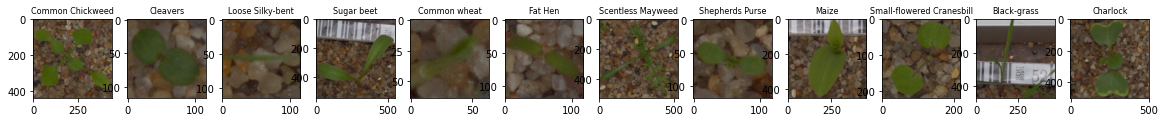

In [60]:
print('Print one image from all the folders')
f, ax = plt.subplots(nrows=1,ncols=12, figsize=(20, 10))
i=0
for d in folder:
  print(folder[i])
  sub_dir_path = train_path + '//' + folder[i]
  x1=os.listdir(sub_dir_path)
  im=imageio.imread(sub_dir_path+'//'+x1[0])
  print("size of the printed image ",im.shape)
  #f, ax = plt.subplots(figsize=(12,5))
  ax[i].imshow(im,resample=True)
  ax[i].set_title(d, fontsize=8)
  i+=1

### The above datadet has different size of images, hence we need to reshape the dataset

In [6]:
path_test = (r'/content/grive/MyDrive/Computer_Vision/train')

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [9]:
for dirname, _, filenames in os.walk(r'/content/grive/MyDrive/Computer_Vision/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/grive/MyDrive/Computer_Vision/train/Common Chickweed/fefaeec6d.png
/content/grive/MyDrive/Computer_Vision/train/Common Chickweed/ffdddcf4e.png
/content/grive/MyDrive/Computer_Vision/train/Common Chickweed/f9b43d3c6.png
/content/grive/MyDrive/Computer_Vision/train/Common Chickweed/fe7373785.png
/content/grive/MyDrive/Computer_Vision/train/Common Chickweed/fe801c9c0.png
/content/grive/MyDrive/Computer_Vision/train/Common Chickweed/fb78383ae.png
/content/grive/MyDrive/Computer_Vision/train/Common Chickweed/fd08aae02.png
/content/grive/MyDrive/Computer_Vision/train/Common Chickweed/fe03224a0.png
/content/grive/MyDrive/Computer_Vision/train/Common Chickweed/f7b86986a.png
/content/grive/MyDrive/Computer_Vision/train/Common Chickweed/fe1092cd5.png
/content/grive/MyDrive/Computer_Vision/train/Common Chickweed/fcceab9ee.png
/content/grive/MyDrive/Computer_Vision/train/Common Chickweed/fcfb8df3d.png
/content/grive/MyDrive/Computer_Vision/train/Common Chickweed/feb7699d0.png
/content/gri

In [10]:
# import library files

import numpy             as np     # Package used to dealt with numbers
import pandas            as pd     # Package used for creating Dataframes and work with it
import scipy.stats       as stats  # package used to perform statistical analysis
import matplotlib.pyplot as plt    # Package used for Visualizations 
%matplotlib inline
import seaborn as sns              # Package used for Visualizations
import os                          # Package for OS
from os import listdir             # Package for listing directrory contents
import csv 

# sklearn.metrics library 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, f1_score, classification_report, roc_auc_score, accuracy_score,precision_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler #(x-mu/sigma)- standardization
from sklearn.preprocessing import StandardScaler   # for normalization
from sklearn.preprocessing import binarize
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline 
from sklearn.svm import SVC
from collections import Counter
from scipy.spatial import distance as dist
import cv2

from tqdm import tqdm 
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
import keras
from keras.applications.vgg16 import VGG16 
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential, Model 
from keras.initializers import he_normal
from keras.layers import Lambda, SeparableConv2D, BatchNormalization, Dropout, MaxPooling2D, Input, Dense, Conv2D, Activation, Flatten 
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Flatten, Dense,BatchNormalization

In [11]:
class_names = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
nb_classes = len(class_names)
image_size = (32,32)
nb_classes

12

### Comments:-
As we seen that in train data set each image has different size, hence we are resizing the each image into 32x32 for further comutation.

In [14]:
def load_data():
    
    datasets = [r'/content/grive/MyDrive/Computer_Vision/train']
    images = []
    labels = []

    # iterate through training and test sets
    count =0
    for dataset in datasets:

        # iterate through folders in each dataset
        for folder in os.listdir(dataset):

            if folder in ['Black-grass']: label = 0
            elif folder in ['Charlock']: label = 1
            elif folder in ['Cleavers']: label = 2
            elif folder in ['Common Chickweed']: label = 3
            elif folder in ['Common wheat']: label = 4
            elif folder in ['Fat Hen']: label = 5
            elif folder in ['Loose Silky-bent']: label = 6
            elif folder in ['Maize']: label = 7
            elif folder in ['Scentless Mayweed']: label = 8
            elif folder in ['Shepherds Purse']: label = 9
            elif folder in ['Small-flowered Cranesbill']: label = 10
            elif folder in ['Sugar beet']: label = 11
            

            # iterate through each image in folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # get pathname of each image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open 
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, image_size)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    return images, labels

In [15]:
images, labels = load_data()

100%|██████████| 390/390 [00:09<00:00, 40.89it/s]


### Supervised learning algorithms

### A. Logistic Regression Model

In [16]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2)
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size = 0.5)

In [17]:
# reshaping X data: (n, 28, 28) => (n, 784)
train_images =train_images.reshape((train_images.shape[0], -1)) #.reshape(60000, 28*28)
test_images = test_images.reshape((test_images.shape[0], -1))

In [18]:
train_images.shape,test_images.shape

((3813, 3072), (477, 3072))

In [ ]:
# converting y data into categorical (one-hot encoding)
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

In [19]:
train_images = train_images / 255.0 
val_images = val_images / 255.0
test_images = test_images / 255.0

In [20]:
train_labels

array([ 0,  4, 11, ...,  8,  3,  2], dtype=int32)

In [21]:
from sklearn.metrics import accuracy_score # similar to .score() -- TP+TN/ all obs
from sklearn.metrics import recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
#fitting model with Logistic Regresssion
lr_model = LogisticRegression(random_state=10)
lr_model.fit(train_images, train_labels)
lr_model.score(train_images, train_labels)
lr_y_pred=lr_model.predict(test_images)

lr_train_accuracy= lr_model.score(train_images, train_labels)
lr_test_accuracy=accuracy_score(test_labels, lr_y_pred)
lr_f1 = f1_score(test_labels, lr_y_pred, average='micro')

#Accuracy score on Train & Test Dataset
print("Model Score on Training Dataset : ",lr_train_accuracy, "Score on Test Dataset : ",lr_test_accuracy)
print()
print("Classification Report")
print()
print(classification_report(test_labels, lr_y_pred, digits=2))

Model Score on Training Dataset :  0.8292682926829268 Score on Test Dataset :  0.48218029350104824

Classification Report

              precision    recall  f1-score   support

           0       0.20      0.18      0.19        17
           1       0.64      0.51      0.57        35
           2       0.61      0.69      0.65        32
           3       0.47      0.50      0.49        68
           4       0.38      0.24      0.29        21
           5       0.32      0.39      0.35        46
           6       0.54      0.68      0.60        62
           7       0.33      0.17      0.22        24
           8       0.46      0.57      0.51        56
           9       0.29      0.19      0.23        27
          10       0.58      0.67      0.62        39
          11       0.60      0.42      0.49        50

    accuracy                           0.48       477
   macro avg       0.45      0.43      0.43       477
weighted avg       0.48      0.48      0.47       477



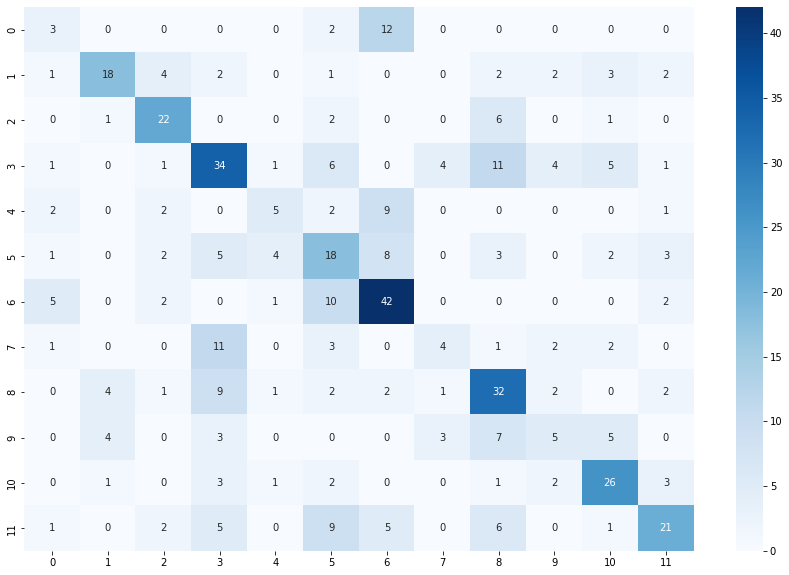

In [22]:
# Displaying Confusion Matrix
conf_mat = confusion_matrix(test_labels, lr_y_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (15,10))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

### Comments:-

1. In the above confusion Matrix the misclassification is too high, Hence we are not reccomended the logistic regression to predict the train images.

### B.GaussianNB

In [23]:
#fitting model with Gaussion Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(train_images,train_labels)
NB_model.score(train_images,train_labels)
NB_y_pred=NB_model.predict(test_images)

NB_train_accuracy= NB_model.score(train_images,train_labels)
NB_test_accuracy=accuracy_score(test_labels, NB_y_pred)
NB_f1 = f1_score(test_labels,NB_y_pred, average='micro')

#Accuracy score on Train & Test Dataset
print("Model Score on Training Dataset : ", NB_train_accuracy, "Score on Test Dataset : ",NB_test_accuracy)
print()
print("Classification Report")
print()
print(classification_report(test_labels, NB_y_pred, digits=2))

Model Score on Training Dataset :  0.2050878573301862 Score on Test Dataset :  0.1970649895178197

Classification Report

              precision    recall  f1-score   support

           0       0.11      0.41      0.17        17
           1       0.16      0.09      0.11        35
           2       0.45      0.31      0.37        32
           3       0.31      0.32      0.31        68
           4       0.17      0.05      0.07        21
           5       0.00      0.00      0.00        46
           6       0.31      0.06      0.11        62
           7       0.25      0.04      0.07        24
           8       0.19      0.32      0.24        56
           9       0.13      0.70      0.21        27
          10       0.33      0.05      0.09        39
          11       0.32      0.14      0.19        50

    accuracy                           0.20       477
   macro avg       0.23      0.21      0.16       477
weighted avg       0.24      0.20      0.17       477



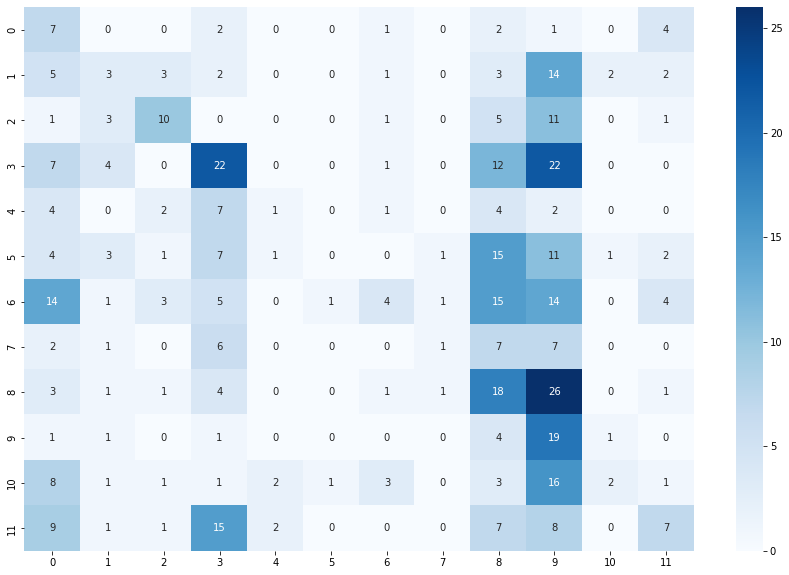

In [24]:
# Displaying Confusion Matrix
conf_mat = confusion_matrix(test_labels, NB_y_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (15,10))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

### Comments:-
1. After introduced the Gaussion NB algorithm, there is no significant improvement, hence we are not reccomonded the GNB to predict the train images.

### C.Support Vector Classifier(SVC)

In [25]:
from sklearn.svm import SVC

svc_classifier = SVC()
svc_classifier.fit(train_images, train_labels)
svc_train_accuracy=svc_classifier.score(train_images, train_labels)
svc_test_accuracy=svc_classifier.score(test_images, test_labels)
svc_y_pred=svc_classifier.predict(test_images)
svc_f1 = (f1_score(test_labels,svc_y_pred, average='micro')*100)
print ('Train Accuracy',svc_train_accuracy )
print ('Test Accuracy', svc_test_accuracy)

Train Accuracy 0.8384474167322319
Test Accuracy 0.46331236897274636


In [26]:
print(classification_report(test_labels, svc_y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.25      0.18      0.21        17
           1       0.54      0.54      0.54        35
           2       0.53      0.53      0.53        32
           3       0.52      0.62      0.56        68
           4       0.50      0.05      0.09        21
           5       0.31      0.22      0.26        46
           6       0.35      0.82      0.50        62
           7       1.00      0.17      0.29        24
           8       0.52      0.57      0.55        56
           9       0.00      0.00      0.00        27
          10       0.56      0.59      0.57        39
          11       0.61      0.38      0.47        50

    accuracy                           0.46       477
   macro avg       0.48      0.39      0.38       477
weighted avg       0.48      0.46      0.43       477



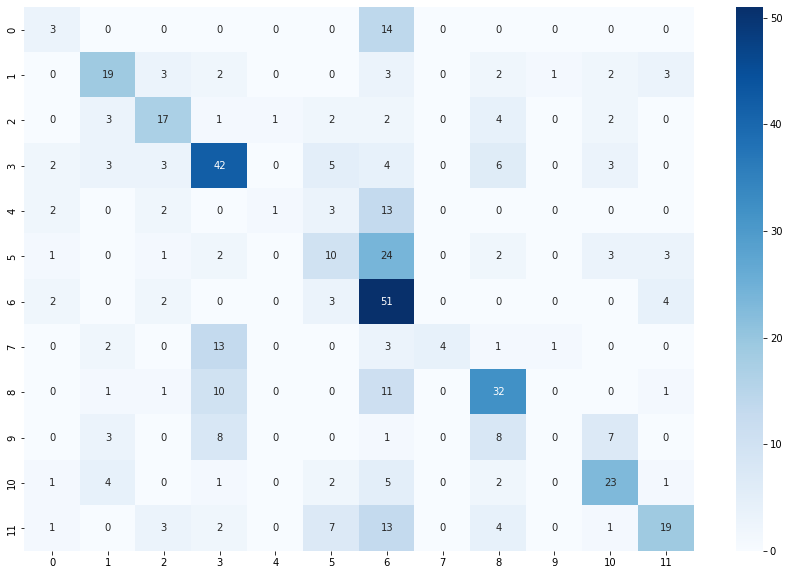

In [27]:
# Displaying Confusion Matrix
conf_mat = confusion_matrix(test_labels, svc_y_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (15,10))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

### Comments:-

After using the SVM also no significant improvement were observed in result, hence we are not reccomended SVM algorithum.

### NN Model

In [28]:
#images, labels = load_data()
images, labels = shuffle(images, labels, random_state=10)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2)
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size = 0.5)

In [29]:
# reshaping X data: (n, 100, 1000) => (n, 30000)
train_images =train_images.reshape((train_images.shape[0], -1)) 
test_images = test_images.reshape((test_images.shape[0], -1))

In [30]:
train_images.shape,test_images.shape

((3813, 3072), (477, 3072))

In [31]:
# converting y data into categorical (one-hot encoding)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [32]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers

In [34]:
import tensorflow as tf
tf.keras.backend.clear_session() 

In [41]:
import tensorflow as tf
import timeit

#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
  #print(
   #   '\n\nThis error most likely means that this notebook is not '
   #   'configured to use a GPU.  Change this in Notebook Settings via the '
   #   'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  #raise SystemError('GPU device not found')


#with tf.device('/device:GPU:0'):
 
  #tf.keras.backend.clear_session() 
model_sigmoid = Sequential()
model_sigmoid.add(Dense(units = 128, input_shape = (3072,)))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(Dense(50))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(Dense(50))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(Dense(50))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(Dense(12)) # 12 labels
model_sigmoid.add(Activation('softmax'))
sgd = optimizers.SGD(lr = 0.01)
model_sigmoid.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
nn_history_sigmoid = model_sigmoid.fit(train_images, train_labels, batch_size = 32, epochs = 100, verbose = 1,validation_data=(test_images, test_labels))





Epoch 1/100
120/120 [==============================] - 1s 6ms/step - loss: 2.4806 - accuracy: 0.1112 - val_loss: 2.4372 - val_accuracy: 0.1111
Epoch 2/100
120/120 [==============================] - 1s 5ms/step - loss: 2.4179 - accuracy: 0.1345 - val_loss: 2.4290 - val_accuracy: 0.1258
Epoch 3/100
120/120 [==============================] - 1s 5ms/step - loss: 2.4148 - accuracy: 0.1406 - val_loss: 2.4326 - val_accuracy: 0.1258
Epoch 4/100
120/120 [==============================] - 1s 6ms/step - loss: 2.4150 - accuracy: 0.1406 - val_loss: 2.4294 - val_accuracy: 0.1258
Epoch 5/100
120/120 [==============================] - 1s 5ms/step - loss: 2.4144 - accuracy: 0.1403 - val_loss: 2.4295 - val_accuracy: 0.1258
Epoch 6/100
120/120 [==============================] - 1s 5ms/step - loss: 2.4141 - accuracy: 0.1387 - val_loss: 2.4288 - val_accuracy: 0.1258
Epoch 7/100
120/120 [==============================] - 1s 5ms/step - loss: 2.4141 - accuracy: 0.1406 - val_loss: 2.4294 - val_accuracy: 0.1258

In [42]:
train_loss_sigmoid,train_acc_sigmoid  = model_sigmoid.evaluate(train_images, train_labels, verbose=1)
print("Training Loss",train_loss_sigmoid)
print("Training Acc",train_acc_sigmoid)

120/120 [==============================] - 0s 3ms/step - loss: 2.3627 - accuracy: 0.2439
Training Loss 2.3627023696899414
Training Acc 0.24390244483947754


In [43]:
test_loss_sigmoid,test_acc_sigmoid  = model_sigmoid.evaluate(test_images, test_labels, verbose=1)
print("Test Loss",test_loss_sigmoid)
print("Test Acc",test_acc_sigmoid)

15/15 [==============================] - 0s 3ms/step - loss: 2.3935 - accuracy: 0.1929
Test Loss 2.3935413360595703
Test Acc 0.19287212193012238


## NN Model with Relu, Batchnormalization, Weight Initialization and Dropout

In [45]:
import tensorflow as tf
import timeit

model_relu = Sequential()
model_relu.add(Dense(units = 128, input_shape = (3072,),kernel_initializer='uniform'))
model_relu.add(BatchNormalization())
model_relu.add(Activation('relu'))
model_relu.add(Dropout(0.2))
model_relu.add(Dense(50,kernel_initializer='uniform'))
model_relu.add(BatchNormalization())
model_relu.add(Activation('relu'))
model_relu.add(Dropout(0.2))
model_relu.add(Dense(50,kernel_initializer='uniform'))
model_relu.add(BatchNormalization())
model_relu.add(Activation('relu'))
model_relu.add(Dropout(0.2))
model_relu.add(Dense(50,kernel_initializer='uniform'))
model_relu.add(BatchNormalization())
model_relu.add(Activation('relu'))
model_relu.add(Dropout(0.2))
model_relu.add(Dense(12)) # 12 labels
model_relu.add(Activation('softmax'))
Adam = optimizers.Adam(lr = 0.01)
model_relu.compile(optimizer = Adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
nn_history_relu = model_relu.fit(train_images, train_labels, batch_size = 100, epochs = 50, verbose = 1,validation_data=(test_images, test_labels))

Epoch 1/50
39/39 [==============================] - 2s 18ms/step - loss: 2.3850 - accuracy: 0.1873 - val_loss: 3.0928 - val_accuracy: 0.0587
Epoch 2/50
39/39 [==============================] - 0s 11ms/step - loss: 1.9802 - accuracy: 0.3058 - val_loss: 2.9117 - val_accuracy: 0.0839
Epoch 3/50
39/39 [==============================] - 0s 11ms/step - loss: 1.7221 - accuracy: 0.3905 - val_loss: 5.1207 - val_accuracy: 0.0901
Epoch 4/50
39/39 [==============================] - 0s 11ms/step - loss: 1.5784 - accuracy: 0.4304 - val_loss: 3.5220 - val_accuracy: 0.1111
Epoch 5/50
39/39 [==============================] - 0s 11ms/step - loss: 1.4257 - accuracy: 0.4841 - val_loss: 2.8478 - val_accuracy: 0.1845
Epoch 6/50
39/39 [==============================] - 0s 11ms/step - loss: 1.3149 - accuracy: 0.5201 - val_loss: 4.0012 - val_accuracy: 0.2725
Epoch 7/50
39/39 [==============================] - 0s 11ms/step - loss: 1.3007 - accuracy: 0.5311 - val_loss: 3.3209 - val_accuracy: 0.2662
Epoch 8/50
39

In [46]:
train_loss_relu,train_acc_relu  = model_relu.evaluate(train_images, train_labels, verbose=1)
print("Training Loss",train_loss_relu)
print("Training Acc",train_acc_relu)


120/120 [==============================] - 1s 5ms/step - loss: 1.1563 - accuracy: 0.6467
Training Loss 1.1563045978546143
Training Acc 0.6467348337173462


In [47]:
test_loss_relu,test_acc_relu  = model_relu.evaluate(test_images, test_labels, verbose=1)
print("Test Loss",test_loss_relu)
print("Test Acc",test_acc_relu)

15/15 [==============================] - 0s 3ms/step - loss: 2.5274 - accuracy: 0.4109
Test Loss 2.5274293422698975
Test Acc 0.4109014570713043


In [48]:
model_relu.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               393344    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation_15 (Activation)  (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 50)                6450      
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                      

### Comments:-

1. After alppying of ML models, now we are using the ANN to predict the train images.
2. In NN model we can easily say that, model is overfit on training and the prediction accuracy is also very low.
3. Hence we are not reccomended that NN model also to predict the train images.

In [72]:
def load_data():
    
    datasets = [r'/content/grive/MyDrive/Computer_Vision/train']
    images = []
    labels = []
    image_size=(100,100)

    # iterate through training and test sets
    count =0
    for dataset in datasets:

        # iterate through folders in each dataset
        for folder in os.listdir(dataset):

            if folder in ['Black-grass']: label = 0
            elif folder in ['Charlock']: label = 1
            elif folder in ['Cleavers']: label = 2
            elif folder in ['Common Chickweed']: label = 3
            elif folder in ['Common wheat']: label = 4
            elif folder in ['Fat Hen']: label = 5
            elif folder in ['Loose Silky-bent']: label = 6
            elif folder in ['Maize']: label = 7
            elif folder in ['Scentless Mayweed']: label = 8
            elif folder in ['Shepherds Purse']: label = 9
            elif folder in ['Small-flowered Cranesbill']: label = 10
            elif folder in ['Sugar beet']: label = 11
            

            # iterate through each image in folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # get pathname of each image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open 
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, image_size)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    return images, labels

In [73]:
images, labels = load_data()
images, labels = shuffle(images, labels, random_state=10)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2)
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size = 0.5)

100%|██████████| 390/390 [00:05<00:00, 66.53it/s]


In [74]:
n_train = train_labels.shape[0]
n_val = val_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of validation examples: {}".format(n_val))
print("Number of testing examples: {}".format(n_test))

print("Training images are of shape: {}".format(train_images.shape))
print("Training labels are of shape: {}".format(train_labels.shape))
print("Validation images are of shape: {}".format(val_images.shape))
print("Validation labels are of shape: {}".format(val_labels.shape))
print("Test images are of shape: {}".format(test_images.shape))
print("Test labels are of shape: {}".format(test_labels.shape))

Number of training examples: 3813
Number of validation examples: 477
Number of testing examples: 477
Training images are of shape: (3813, 100, 100, 3)
Training labels are of shape: (3813,)
Validation images are of shape: (477, 100, 100, 3)
Validation labels are of shape: (477,)
Test images are of shape: (477, 100, 100, 3)
Test labels are of shape: (477,)


In [75]:
train_images = train_images / 255.0 
val_images = val_images / 255.0
test_images = test_images / 255.0

## CNN Model

In [77]:
import tensorflow as tf
import timeit

model1 = Sequential()

# First Conv Layer
model1.add(Conv2D(16 , (3,3) , activation = 'relu' , input_shape = (100,100,3)))
model1.add(MaxPooling2D(pool_size = (2,2)))

# Second Conv Layer
model1.add(Conv2D(32, (3,3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.25))

# Third Conv Layer
model1.add(Conv2D(64, (3,3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.25))

# Fourt Conv Layer
model1.add(Conv2D(64, (3,3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.25))

# FC layer
model1.add(Flatten())
model1.add(Dense(units = 128 , activation = 'relu'))
model1.add(Dropout(0.25))

# Output layer
model1.add(Dense(units = 12 , activation = 'softmax'))

# Compile
model1.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model1.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 23, 23, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)       

In [104]:
# Train
history1 = model1.fit(
    train_images, 
    train_labels, 
    batch_size = 32, 
    epochs = 15, 
    validation_data=(val_images, val_labels))

Epoch 1/15
120/120 [==============================] - 35s 292ms/step - loss: 0.4106 - accuracy: 0.8628 - val_loss: 0.4631 - val_accuracy: 0.8365
Epoch 2/15
120/120 [==============================] - 36s 297ms/step - loss: 0.4538 - accuracy: 0.8411 - val_loss: 0.4085 - val_accuracy: 0.8595
Epoch 3/15
120/120 [==============================] - 35s 292ms/step - loss: 0.3796 - accuracy: 0.8647 - val_loss: 0.4053 - val_accuracy: 0.8512
Epoch 4/15
120/120 [==============================] - 35s 291ms/step - loss: 0.3768 - accuracy: 0.8610 - val_loss: 0.4039 - val_accuracy: 0.8553
Epoch 5/15
120/120 [==============================] - 35s 290ms/step - loss: 0.3643 - accuracy: 0.8678 - val_loss: 0.3947 - val_accuracy: 0.8595
Epoch 6/15
120/120 [==============================] - 35s 291ms/step - loss: 0.3433 - accuracy: 0.8746 - val_loss: 0.4240 - val_accuracy: 0.8616
Epoch 7/15
120/120 [==============================] - 35s 295ms/step - loss: 0.3324 - accuracy: 0.8765 - val_loss: 0.4435 - val_ac

# Evaluating performance

In [112]:
def plot_accuracy_loss_chart(history):
    epochs = [i for i in range(15)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(20,10)
    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

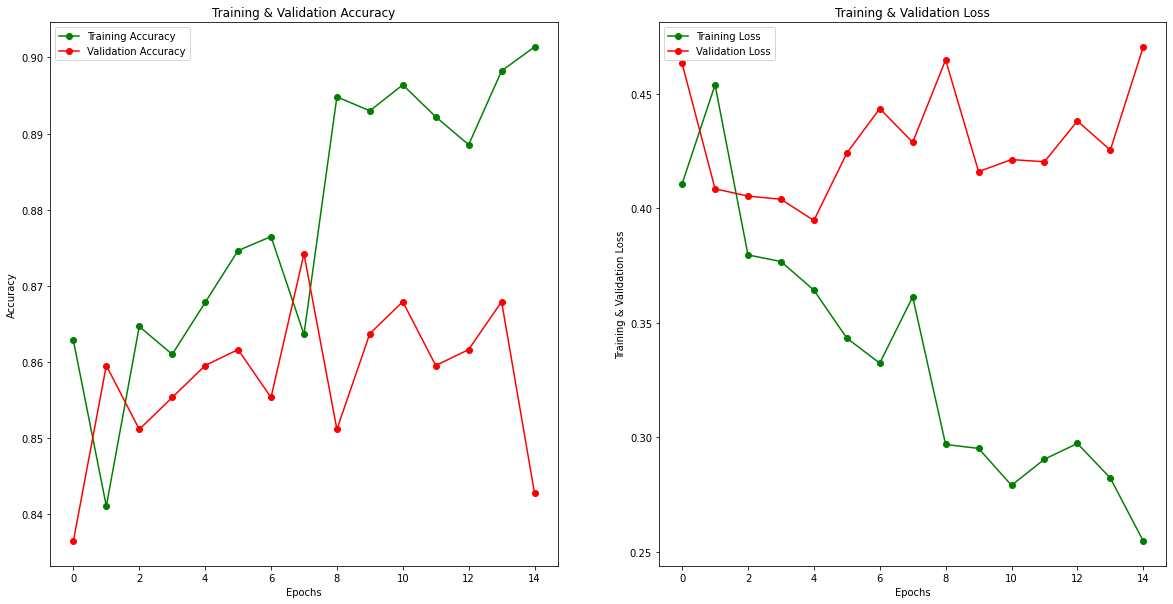

In [113]:
plot_accuracy_loss_chart(history1)

### Comments:-
1. In the above graph Training Acc & Validation Acc and Training loss & validation Loss are moreover inline with each other.
  

In [114]:
results = model1.evaluate(test_images, test_labels)


cnn_test_accuracy=results[1]*100
cnn_test_loss=results[0]

print(" Test Loss of the model ", results[0])
print(" Test Accuracy of the model", results[1]*100, "%")


results = model1.evaluate(val_images, val_labels)

print("Validation Loss of the model ", results[0])
print("Validation Accuracy of the model ", results[1]*100, "%")
cnn_val_accuracy=results[1]*100
cnn_val_loss=results[0]

results = model1.evaluate(train_images, train_labels)

print("Train Loss of the model ", results[0])
print("Train Accuracy of the model ", results[1]*100, "%")

cnn_train_accuracy=results[1]*100
cnn_train_loss=results[0]

15/15 [==============================] - 1s 84ms/step - loss: 0.6281 - accuracy: 0.8197
 Test Loss of the model  0.628067672252655
 Test Accuracy of the model 81.97064995765686 %
15/15 [==============================] - 1s 85ms/step - loss: 0.4704 - accuracy: 0.8428
Validation Loss of the model  0.47035497426986694
Validation Accuracy of the model  84.27672982215881 %
120/120 [==============================] - 10s 84ms/step - loss: 0.1412 - accuracy: 0.9552
Train Loss of the model  0.14121359586715698
Train Accuracy of the model  95.51534056663513 %


### Comments:-
1. Test loss and Test Acc are 0.62 and 81% respectively.
2. Val loss and Val Acc are 0.47 and 84.97% respectively.
3. Train loss and Train Acc are 0.14 and 95.51% respectively.
4. Hence, CNN model is very good for train image prediction and highly reccomended.

In [115]:
from sklearn.metrics import classification_report

predictions = model1.predict(test_images)
predictions = np.argmax(predictions,axis=1)
predictions[:15]

array([10, 10,  1,  8,  7,  4,  3,  3,  3,  8,  3, 11,  4,  6,  6])

In [116]:
print(classification_report(
    test_labels, 
    predictions, 
    target_names = ['Black-grass (Class 0)', 'Charlock (Class 1)', 'Cleavers (Class 2)', 'Common Chickweed (Class 3)', 'Common wheat (Class 4)', 'Fat Hen (Class 5)', 'Loose Silky-bent (Class 6)', 'Maize (Class 7)', 'Scentless Mayweed (Class 8)', 'Shepherds Purse (Class 9)', 'Small-flowered Cranesbill (Class 10)', 'Sugar beet(Class 11)']))

                                      precision    recall  f1-score   support

               Black-grass (Class 0)       0.47      0.31      0.38        29
                  Charlock (Class 1)       0.97      0.83      0.89        46
                  Cleavers (Class 2)       0.86      0.95      0.90        20
          Common Chickweed (Class 3)       0.81      0.95      0.87        65
              Common wheat (Class 4)       0.87      0.65      0.74        20
                   Fat Hen (Class 5)       0.86      0.93      0.90        46
          Loose Silky-bent (Class 6)       0.69      0.87      0.77        62
                     Maize (Class 7)       0.96      0.74      0.84        31
         Scentless Mayweed (Class 8)       0.89      0.78      0.83        50
           Shepherds Purse (Class 9)       0.82      0.56      0.67        25
Small-flowered Cranesbill (Class 10)       0.90      0.98      0.94        48
                Sugar beet(Class 11)       0.75      0.86      

In [117]:
cm = confusion_matrix(test_labels, predictions)
cm = pd.DataFrame(cm, index = ['0', '1', '2', '3','4','5','6','7','8','9','10','11'], columns = ['0', '1', '2', '3','4','5','6','7','8','9','10','11'])


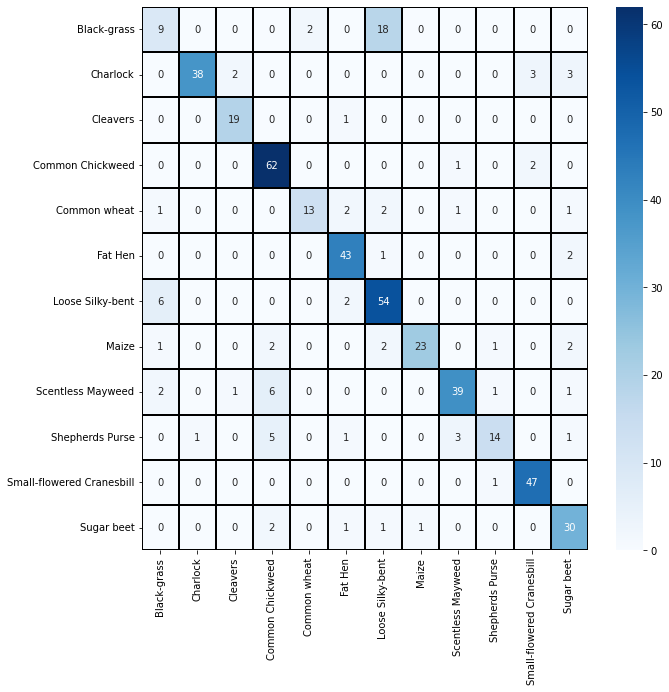

In [118]:
def plot_confusion_matrix (cm):
    plt.figure(figsize = (10,10))
    sns.heatmap(
        cm, 
        cmap = 'Blues', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt = '', 
        xticklabels = class_names, 
        yticklabels = class_names)
    
plot_confusion_matrix(cm)

### Comments:-
1. In the above confusion matrix misclassification is very less than the other algorithum, hence CNN is highly reccomended.

## 3. Compare the results from the above step along with your detailed observations on the best performing algorithm and why/how it outperforms other algorithms in this case

In [119]:
Result_comp={'Model':['LR','NB','SVC','NN_SIGMOID','NN_BN_RELU',"CNN"],
            'Train Accuracy':[lr_train_accuracy*100,NB_train_accuracy*100,svc_train_accuracy*100,train_acc_sigmoid*100,train_acc_relu*100,cnn_train_accuracy],
            'Test Accuracy':[lr_test_accuracy*100,NB_test_accuracy*100,svc_test_accuracy*100,test_acc_sigmoid*100,test_acc_relu*100,cnn_test_accuracy]}
metrics=pd.DataFrame(Result_comp)
metrics

,Model,Train Accuracy,Test Accuracy
0,LR,82.926829,48.218029
1,NB,20.508786,19.706499
2,SVC,83.844742,46.331237
3,NN_SIGMOID,24.390244,19.287212
4,NN_BN_RELU,64.673483,41.090146
5,CNN,95.515341,81.970650


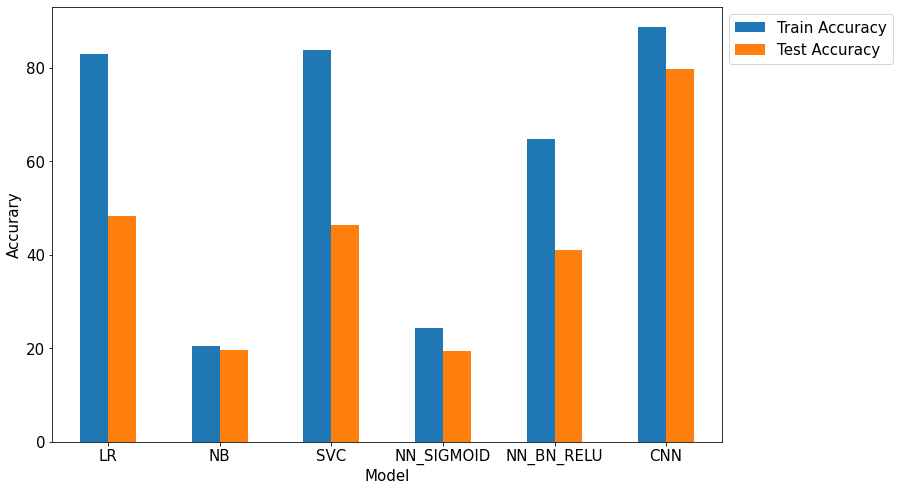

In [90]:
ax = metrics.plot(x='Model',kind='bar', rot=0, figsize = (12,8), fontsize = 15) #, colormap='Paired')
ax.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
ax.set_ylabel("Accurary", fontsize=15)
ax.set_xlabel("Model", fontsize=15)
plt.show()

### Comments

With the multiple model that we have trained, we can observe that either model has been overfit or accuracy or prediction rate is good. With CNN, we have both good accuarcy and not overfit model.So, we can save CNN model as best model and use of prediction



## 4.Pickle the best performing model.

In [105]:
#Set the path where you want to store the model and weights 
model1.save('cnn_plantSeedling.h5')
model1.save_weights('cnn_plantSeedling_weights.h5')

## 5. Import the the test image [ from the “ Prediction” folder ] to predict the class. Display the image. Use the best trained image classifier model to predict the class.

In [106]:
image_size=(100,100)
 # Open 
image = cv2.imread(r'/content/grive/MyDrive/Computer_Vision/Predict.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
# resize the image
image = cv2.resize(image, image_size)

image.shape


(100, 100, 3)

Since our CNN model accepts image size of 100 by 100, we are converting the image to required size

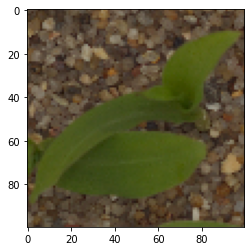

In [107]:
plt.imshow(image )

In [108]:
imgs=[]
imgs.append(image)

In [109]:
imgs = np.array(imgs, dtype = 'float32')
imgs=imgs/255

#Load a model

model_final = tf.keras.models.load_model('cnn_plantSeedling.h5')



In [110]:
imgs.shape

(1, 100, 100, 3)

In [111]:
results = model_final.predict(imgs)
results = np.argmax(results,axis = 1)
#results = pd.Series(results,name="Label")
print("Predicted class is:",results[0])
print(" Class Name is:",class_names[results[0]])

Predicted class is: 7
 Class Name is: Maize


### Comments:-

CNN Model is predicted correctly the test image.